### < Topic >

1. review


2. topic

    2.1 언어 모델

    2.2 단어 표현

### Review - 데이터 분리 (수동)

1. x(독립 변수), y(종속 변수) 분리


2. 학습 데이터 / 테스트 데이터 분리: 사이킷런 라이브러리의 method 사용

### 학습 데이터 / 테스트 데이터 분리

In [11]:
import numpy as np

x, y = np.arange(0,24).reshape((12,2)), range(12)

In [12]:
print(x)
print(list(y))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [14]:
n_of_train = int(len(x) * 0.8)  # 전체 데이터의 80%
n_of_test = int(len(x) - n_of_train)   # 전체 데이터에서 80%를 제외

print(n_of_train)
print(n_of_test)

9
3


    ⇒ 개수만 확인
    n_of_test에서 0.2를 곱하지 않는 이유: 그냥 int로 만들어버린 것이므로 데이터 누락 가능

In [17]:
x_test = x[n_of_test:]  # 전체 데이터의 20%만큼 뒤의 데이터
y_test = y[n_of_test:]
x_train = x[:n_of_train]
y_train = y[:n_of_train]  # 전체 데이터의 80%만큼 앞의 데이터

In [18]:
print(x_train)
print(list(y_test))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]]
[3, 4, 5, 6, 7, 8, 9, 10, 11]


# 언어 모델( Language Model )


언어 모델( Language Model, LM )은 언어라는 현상을 모델링하고자 단어 시퀀스(문장)에 확률을 할당하는 모델

참고: https://datascienceschool.net/view-notebook/a0c848e1e2d343d685e6077c35c4203b/

#### SLM (Statistical Language Model)
   - 전통적인 언어 모델
   - 조건부 확률 이용


#### SLM 의 한계

   1. 훈련 corpus에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점 (희소 문제)

   2. 확률을 계산하고 싶은 문장이 길어질수록 갖고 있는 corpus에서 그 문장이 존재하지 않을 가능성이 높다는 점
    
    
#### ⇒ 해결책: 참고하는 단어 개수를 줄이면 확률을 높일 수 있음

## n-gram Language Model

- 확률을 이용한 통계적 접근 방법을 활용하므로 SLM의 한 종류 
- 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하여 접근하는 방법

참고: https://www.edwith.org/deepnlp/lecture/29214/
        
    n-gram : 임의의 개수를 정하기 위한 기준을 사용하는 것, n개의 연속적인 단어 나열을 의미

    unigram : An, adorable, little, boy, is, spreading, smiles

    bigram : An adorable, adorable little, little boy, boy is, is spreading, spreading smiles

    trigram : An adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles

    4-gram : An adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles



- An adorable little boy is spreading [ w ]

- SLM : P( w | An adorable little boy is spreading )

- n-gram : P( w | boy is spreading ) = count( boy is spreading w ) / count( boy is spreading )

#### n-gram 한계
1. n-gram 언어 모델도 희소 문제 존재
2. n을 선택하는것에 대한 trade-off 문제 : 통상 n은 5를 넘지 않는 범위에서 결정하길 권장

## NLTK n-gram 코드

#### 먼저 bigrams(), ngrams()를 이용하여, n-gram을 만든다.

In [6]:
from nltk import bigrams, word_tokenize  # bigram library
from nltk.util import ngrams  # n-gram library

In [21]:
sentence = "I am a boy."
tokens = word_tokenize(sentence)
print(tokens)

['I', 'am', 'a', 'boy', '.']


In [22]:
bigram = bigrams(tokens)    # bigram 언어 모델 생성
trigram = ngrams(tokens, 3) # trigram 언어 모델 생성

In [23]:
print('\nbigram')
for t in bigram:
    print(t)

print('\ntrigram')
for t in trigram:
    print(t)


bigram
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


#### 조건부 확률을 추정할 때는 문장의 시작과 끝이라는 조건을 표시하기 위해 모든 문장에 시작과 끝을 나타내는 특별한 토큰(token)을 추가한다. 
예를 들어, 문장 시작 'SS', 문장 끝 'SE' 토큰을 사용한다.

In [24]:
# pad: 어떤 간격 사이의 공간

bigram = ngrams(tokens, 2, pad_left = True, pad_right = True,
               left_pad_symbol = 'SS', right_pad_symbol = 'SE')

In [25]:
for t in bigram:
    print(t)

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


#### 조건부 확률 추정 방법: NLTK 패키지를 사용해 bigram 형태의 조건부 확률을 추정할 수 있다.

1. ConditionalFreqDist 클래스: 각 문맥(context)별 단어 빈도 측정

2. ConditionalProbDist 클래스: 조건부 확률 추정

In [10]:
from nltk import ConditionalFreqDist

In [28]:
sentence = 'I am a boy.'
tokens = word_tokenize(sentence)
bigram = ngrams(tokens, 2, pad_left = True, pad_right = True, 
               left_pad_symbol = 'SS', right_pad_symbol = 'SE')
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])  # 빈도수 계산

In [29]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [30]:
cfd["SS"]

FreqDist({'I': 1})

In [31]:
cfd['I']

FreqDist({'am': 1})

In [32]:
cfd['boy']

FreqDist({'.': 1})

## 실습: NLTK 패키지의 sample corpus인 movie_reviews의 텍스트로부터 bigram 확률 추정

In [33]:
import nltk
# nltk.download('movie_reviews')
# nltk.download('punkt')

from nltk.corpus import movie_reviews

In [156]:
sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left = True, pad_right = True,
                  left_pad_symbol = 'SS', right_pad_symbol = 'SE')
    sentences += [t for t in bigram]

sentences[:20]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

### 1. ConditionalFreqDist 클래스: 단어 빈도 측정

In [157]:
cdf = ConditionalFreqDist(sentences)

#### 문장의 처음에 올 수 있는 단어들

In [158]:
cdf['SS'].most_common(5)   # 빈도수 내림차순 출력 method

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

#### 해당 단어 다음에 올 수 있는 단어들

In [159]:
cdf['i'].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [160]:
cdf['.'].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

#### - 시각화

In [161]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family= font_name)
print(plt.rcParams['font.family'])

['Malgun Gothic']


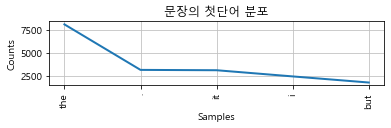

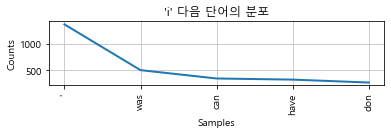

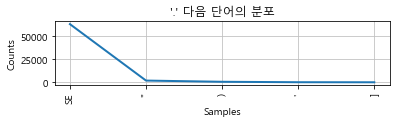

In [162]:
plt.subplot(311)
cdf['SS'].plot(5, title = '문장의 첫단어 분포')
plt.subplot(312)
cdf['i'].plot(5, title = "'i' 다음 단어의 분포")
plt.subplot(313)
cdf['.'].plot(5, title = "'.' 다음 단어의 분포")

### 2. ConditionalProbDist 클래스: 조건부 확률 추정

#### ConditionalProbDist 클래스에 MLEProbDist 클래스 팩토리를 인수로 넣어 빈도 추정 가능

In [11]:
from nltk.probability import ConditionalProbDist, MLEProbDist

In [52]:
cpd = ConditionalProbDist(cdf, MLEProbDist)

#### ConditionalProbDist() 수행이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

In [54]:
cdf['i'].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [57]:
cpd['i'].prob('am')

0.018562267971650354

In [60]:
cpd['i'].prob('was')

0.05692428844639442

In [58]:
cpd['we'].prob('are')

0.08504504504504505

In [59]:
cpd['we'].prob('is')

0.0

## bigram 언어 모델

조건부 확률을 알게 되면, 각 문장의 확률을 구할 수 있다.

bigram 언어 모델에서 전체 문장의 확률은 다음과 같은 조건부 확률의 곱으로 나타낸다.

P(SS I am a boy. SE) = P(I | SS) x P(am | I) x P(a | am) x P(boy | a) x P(. | boy) x P(SE | .)

In [68]:
# 문장(단어 시퀀스) 리스트를 만든다.

def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i+1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps) # eps: 표현 가능한 가장 작읍 값을 돌려줌
    
    return np.exp(p)

In [69]:
test_sentence = ['i', 'like', 'the', 'movie', '.']
sentence_score(test_sentence)

2.740764134071561e-06

In [70]:
test_sentence = ['like', 'i', 'the', '.', 'movie']
sentence_score(test_sentence)

1.5015040140827832e-38

In [73]:
# 무작위 문장 생성 (언어 모델의 목적: 번역, 오타 수정, 음성 인식, 챗봇)

def generate_sentence(seed = None):
    if seed is not None:
        import random
        random.seed(seed)
    c = 'SS'
    sentence = []
    while True:
        if c not in cpd:  # 문장 시작이 없으면 break
            break
            
        w = cpd[c].generate()    # cpd[c]는 다음 단어 의미
        
        if w == 'SE':  # 문장이 끝이면 break
            break
        elif w in ['i', 'ii', 'iii']:
            w2 = w.upper()
        elif w in ['mr', 'luc', 'i', 'robin', 'williams', 'cindy', 'crawford']:
            w2 = w.title()
        else:        # 위 조건들이 아니면 원래 단어 그대로
            w2 = w
        
        if c == 'SS':
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)         
        c = w
    return "".join(sentence)

In [74]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."

In [75]:
generate_sentence(3)

'The bugs, by depicting the movie even an excellent australian director asks.'

In [76]:
generate_sentence(2)

'Scorsese as a movie almost painful episode again) is rather than to give away free yourself one.'

## 실습: Naver sentiment movie corpus로 랜덤 문장 생성

데이터 출처: https://github.com/e9t/nsmc

In [1]:
# data open

import codecs

with codecs.open('ratings_train.txt', encoding = 'utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:] # header 제외
    
docs = [row[1] for row in data]

len(docs)

150000

In [2]:
from konlpy.tag import Okt

okt = Okt()

In [3]:
# 품사 태깅하는 tokenize 함수 생성

def tokenize(doc):
    tokens = ['/'.join(t) for t in okt.pos(doc)]
    return tokens

In [4]:
# tokenize 함수 테스트

tokenize("그 영화는 아주 재미있었어요.")

['그/Noun', '영화/Noun', '는/Josa', '아주/Noun', '재미있었어요/Adjective', './Punctuation']

In [7]:
# bigram 생성 (토큰화까지 진행)

from tqdm import tqdm  # progress bar

sentence = []
for d in tqdm(docs):
    tokens = tokenize(d)
    bigram = ngrams(tokens, 2, pad_left = True, pad_right = True,
                  left_pad_symbol = 'SS', right_pad_symbol = 'SE')
    sentence += [t for t in bigram]

100%|█████████████████████████████████████████████████████████████████████████| 150000/150000 [09:04<00:00, 275.71it/s]


In [8]:
sentence[:30]

[('SS', '아/Exclamation'),
 ('아/Exclamation', '더빙/Noun'),
 ('더빙/Noun', '../Punctuation'),
 ('../Punctuation', '진짜/Noun'),
 ('진짜/Noun', '짜증나네요/Adjective'),
 ('짜증나네요/Adjective', '목소리/Noun'),
 ('목소리/Noun', 'SE'),
 ('SS', '흠/Noun'),
 ('흠/Noun', '.../Punctuation'),
 ('.../Punctuation', '포스터/Noun'),
 ('포스터/Noun', '보고/Noun'),
 ('보고/Noun', '초딩/Noun'),
 ('초딩/Noun', '영화/Noun'),
 ('영화/Noun', '줄/Noun'),
 ('줄/Noun', '..../Punctuation'),
 ('..../Punctuation', '오버/Noun'),
 ('오버/Noun', '연기/Noun'),
 ('연기/Noun', '조차/Josa'),
 ('조차/Josa', '가볍지/Adjective'),
 ('가볍지/Adjective', '않구나/Verb'),
 ('않구나/Verb', 'SE'),
 ('SS', '너/Modifier'),
 ('너/Modifier', '무재/Noun'),
 ('무재/Noun', '밓었/Noun'),
 ('밓었/Noun', '다그/Noun'),
 ('다그/Noun', '래서/Noun'),
 ('래서/Noun', '보는것을/Verb'),
 ('보는것을/Verb', '추천/Noun'),
 ('추천/Noun', '한/Josa'),
 ('한/Josa', '다/Adverb')]

In [12]:
cfd = ConditionalFreqDist(sentence)
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [13]:
# 단어별 빈도 계산 함수 생성

def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

In [105]:
korean_most_common("나", 10)

[('는/Josa', 831),
 ('의/Josa', 339),
 ('만/Josa', 213),
 ('에게/Josa', 148),
 ('에겐/Josa', 84),
 ('랑/Josa', 81),
 ('한테/Josa', 50),
 ('참/Verb', 45),
 ('이/Determiner', 44),
 ('와도/Josa', 43)]

In [106]:
korean_most_common("의", 10)

[('영화/Noun', 19),
 ('연기/Noun', 14),
 ('구심/Noun', 12),
 ('모습/Noun', 9),
 ('감독/Noun', 8),
 ('매력/Noun', 7),
 ('감동/Noun', 7),
 ('흐름/Noun', 6),
 ('그/Noun', 6),
 ('이야기/Noun', 6)]

In [107]:
korean_most_common(".", 10, "Punctuation")

[('SE', 26503),
 ('영화/Noun', 667),
 ('이/Noun', 565),
 ('정말/Noun', 480),
 ('그리고/Conjunction', 455),
 ('./Punctuation', 445),
 ('하지만/Conjunction', 369),
 ('이/Determiner', 352),
 ('그/Noun', 325),
 ('스토리/Noun', 317)]

In [14]:
# 조건부 확률 계산 함수 생성

def korean_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    return cpd[context].prob(word)

In [109]:
korean_bigram_prob('이', '영화')

0.4010748656417948

In [111]:
korean_bigram_prob('영화', '이')

0.00015767585785521414

In [15]:
# 무작위 문장 생성 함수

def generate_korean_sentence(seed = None, debug = False):
    if seed is not None:
        import random
        random.seed(seed)
    c = 'SS'
    sentence = []
    while True:
        if c not in cpd:  # 문장 시작이 없으면 break
            break
            
        w = cpd[c].generate()    # cpd[c]는 다음 단어 의미 (해당하는 확률값에 대한 단어)
        
        if w == 'SE':  # 문장이 끝이면 break
            break
        w2 = w.split('/')[0]
        pos = w.split('/')[1]
        
        if c == 'SS':
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w2 in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ['Josa', 'Puncuation', 'Suffix']:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                   "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2) 
            
        c = w
        
        if debug:
            print(w)
            
    return "".join(sentence)

In [16]:
generate_korean_sentence(0)

'미키짱과 말도 전혀 빗나가지 않던 전개로 꽥꽥대는거 보니까 요 ^^'

In [17]:
generate_korean_sentence(1)

'내용 일테인데 이 영화 최고의 암살 할려고 한 데 선배랑 김선아 연기도 크다. 배슬기 여배우도 있는 척 하는거지?'

In [18]:
generate_korean_sentence(2)

'도리까지 본 영화 너무 ... 뭔가 .. 최고네요. 하지만 .. 눈물 낫다는건 또 영화에 들지 않는다. 근데 뭐야 어떻게 그렇게 착했던 윤재랑은 에바 그린 드레스 소리 듣는거임 """ 에리 욧의 미모로 합성 한 가수 노래와 흥행 놓친 영화다. 사투리 연기 하나 없는 ‘ 스피드 감 넘치는 스릴 넘치는 연기를 이해 되지 못 하시는 분보다 훨 재밌구만 평점을 망처 놓은 듯하다. 영화 보는이로 하여금 불편함을 느꼇을듯'

In [19]:
generate_korean_sentence(5)

'좋았어요 ... ㅎㄷㄷㄷ 시나리오나 그래픽이 대단한 심리전이 미라 파스틱 함 .. 너무 무섭고 나쁜세 끼는 듯 진짜 꼭 필요가 있는지도 모르겠지만 나름 그의 복수 후 !!!!!!!!!!!'

# 단어 표현 방법

1) 국소 표현(Local Representation) 방법 - 이산 표현(Discrete Representation)
    
    해당 단어 그 자체만 보고, 특정값을 mapping하여 단어를 표현하는 방법
    단어의 의미, 뉘앙스를 표현할 수 없다.
    
    ex) 강아지:1, 귀엽다:2, 사랑스럽다:3

2) 분산 표현(Distributed Representation) 방법 - 연속 표현(Continuous Represnetation)
    
    해당 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법
    단어와 뉘앙스를 표현할 수 있다.
    
    ex) 강아지 [ 귀엽다, 사랑스럽다 ]

<img src = 'https://wikidocs.net/images/page/31767/wordrepresentation.PNG'>

## Bag of Words (BoW)

- Local Representation 방법, count-based의 단어 표현

- 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

- n-gram과의 차이점: 단어가 나올 확률 계산이 아니라 출현 빈도에 따른 단어 표현법

- integer encoding과의 차이점: 빈도를 계산 후 그에 따라 순서대로 인덱스를 부여하는 encoding과는 다름


#### BoW를 만드는 과정

    1. 각 단어에 고유한 정수 인덱스 부여
    2. 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 vector 생성

## BoW 코드
### 문서 1: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.

In [131]:
from konlpy.tag import Okt
import re
okt = Okt()

# cleaning: 정규표현식을 사용한 온점 제거
token = re.sub("(\.)", "", "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")

# tokenization: okt 형태소 분석기
token = okt.morphs(token)
print(token)

# indexing: dictionary 만들기
word2index = {} # 단어별 인덱스 저장용
bow = []       # 등장 횟수 vector
for voca in token:
    if voca not in word2index.keys():  
        word2index[voca] = len(word2index)  # word2index에 없는 단어는 새로 추가
        bow.insert(len(word2index)-1, 1)   # bow 전체에 기본값 저장, 단어 등장횟수는 최소 1 이상
    else:
        index = word2index.get(voca)  # 재등장 단어의 인덱스 획득
        bow[index] = bow[index] +1    # 재등장 단어의 등장횟수 증가

print('\n', word2index)

print('\n', bow)

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']

 {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}

 [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


- BoW에 있어서 중요한 것은 단어의 등장 빈도
- 단어의 순서, 즉 인덱스의 순서는 중요하지 않음

BoW는 각 단어가 등장한 횟수를 수치화하는 단어 표현 방법이기 때문에, 주로 어떤 단어가 얼마나 등장했는가를 기준으로 문서가 "어떤 성격의 문서인지를 판단하는 작업"에 사용한다.

#### 즉, "분류 문제"나 "여러 문서 간의 유사도를 구하는 문제"에 주로 쓰인다.

## CountVectorizer 클래스로 BoW 만들기

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['You know I want your love. because I love you']
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray())   # 코퍼스로부터 각 단어의 반도수 기록
print(vector.vocabulary_)   # 각 단어의 인덱스가 어떻게 부여되었는지 확인

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#### CountVectorizer() 사용시 주의점
    1. 단어 길이가 2 이상인 단어만 토큰으로 인식
    2. 토큰화를 띄어쓰기만으로 수행 (한글에 적용하면 제대로 결과가 안 나옴)

### 실습 과제: 
네이버 영화 한줄평 크롤링 결과를 이용해서 
1. BPE 실습
2. 데이터 분리
3. n-gram 언어 모델 실습
4. BoW 실습